<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/Trader_com_Bandas_de_Bollinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python para Finanças Quantitativas**

Curso do canal [**Outspoken Market.**](https://youtu.be/y-OO9g6R-Hc)

In [10]:
#Carregando as bibliotecas necessárias

from pandas_datareader import data as pdr #suporte para download do yahoofinance
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
!pip install yfinance #instalando
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3MB 3.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=60ec3473dbf4ce1064dc239b71a217b2ea813d10a9858350ccd1766ea08c4016
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [14]:
# configurações iniciais
ticker = "^BVSP" #ativo 
inicio = '2015-01-01'
fin = '2021-06-01'

In [16]:
# Coleta de dados
df = pdr.get_data_yahoo(ticker, start=inicio, end=fin) #método do pdr

[*********************100%***********************]  1 of 1 completed


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,124032.0,124696.0,122701.0,122988.0,122988.0,8914500
2021-05-26,122988.0,124256.0,122988.0,123989.0,123989.0,8258400
2021-05-27,123989.0,124537.0,123470.0,124367.0,124367.0,0
2021-05-28,124367.0,125698.0,124284.0,125561.0,125561.0,8838500
2021-05-31,125561.0,126216.0,125540.0,126216.0,126216.0,5946500


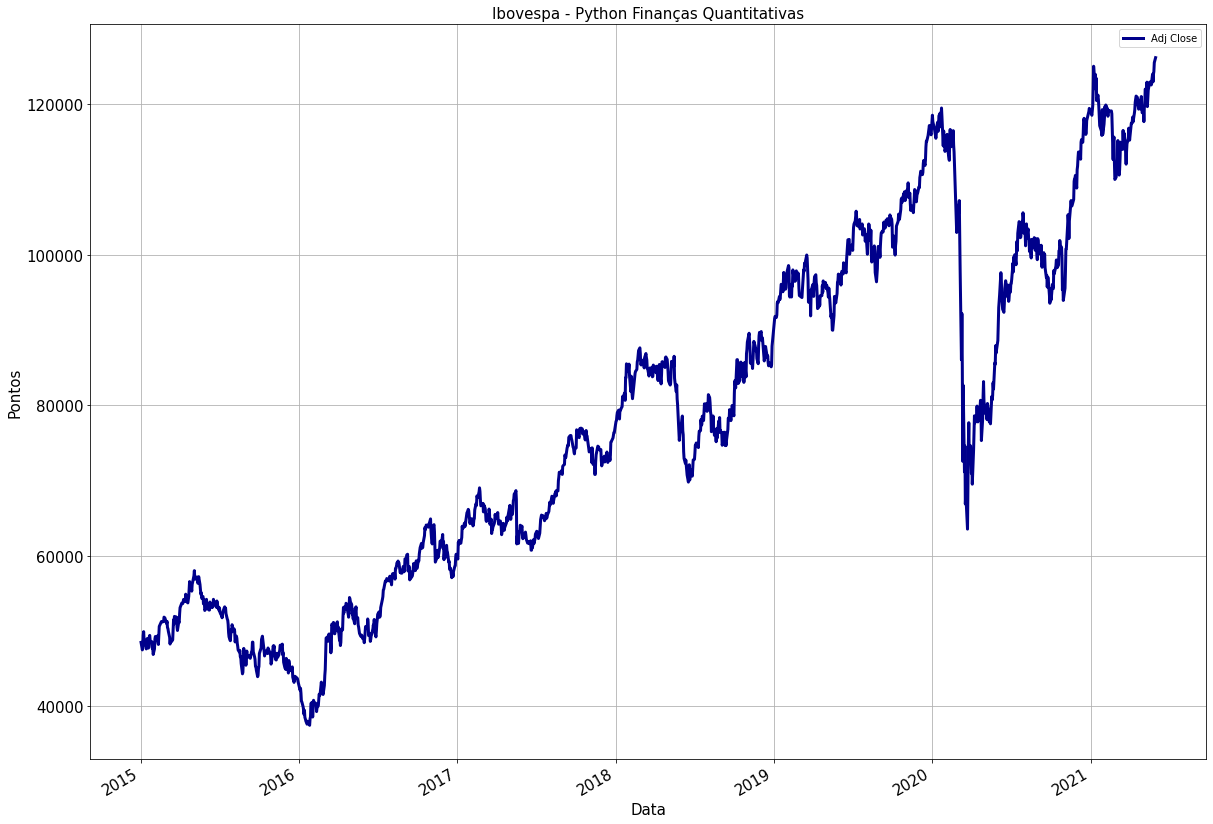

In [23]:
# Primeiro gráfico
df['Adj Close'].plot(grid=True, figsize=(20,15), linewidth=3, 
                     fontsize=15, color='darkblue')
plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();


In [30]:
# Calculando as bandas de bollinger

#Parâmetros iniciais
periodo =21
desvios = 2

df['desvio'] = df['Adj Close'].rolling(periodo).std()
df['MM'] = df['Adj Close'].rolling(periodo).mean()
df['Band_Sup'] = df['MM'] + (df['desvio']*desvios)
df['Band_Inf'] = df['MM'] - (df['desvio']*desvios)

In [28]:
#filtrando os valores missings, devido a criação de colunas com rolling
df = df.dropna(axis=0)

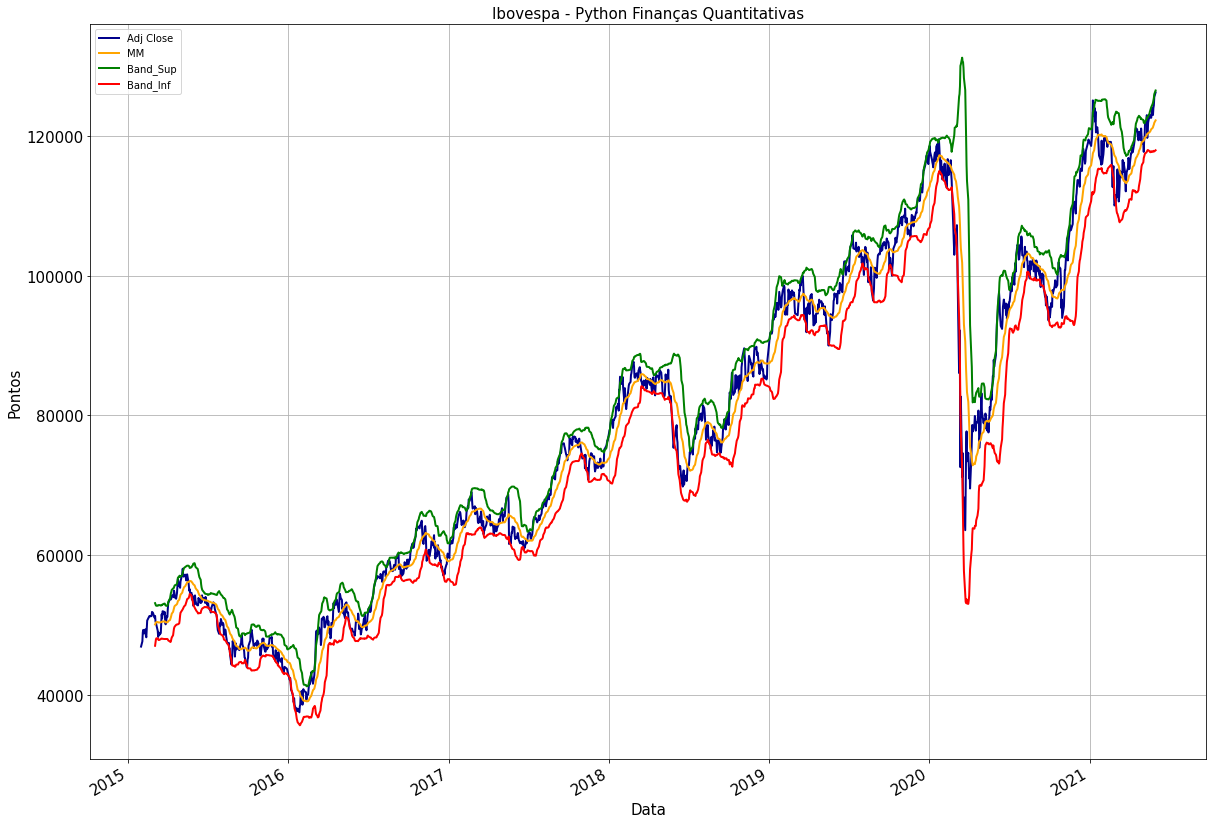

In [31]:
# Inserindo tudo no gráfico

df[['Adj Close','MM','Band_Sup','Band_Inf']].plot(grid = True,
                                                    figsize= (20,15),
                                                    linewidth=2,
                                                    fontsize=15,
                                                    color=['darkblue','orange','green','red'])

plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();

In [34]:
#Construção dos alvos, estratégia
periodos = 1

#Alvo  - Retorno
df.loc[:,'Retorno'] = df['Adj Close'].pct_change(periodos)
df.loc[:,'Alvo'] = df['Retorno'].shift(periodos)


In [38]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Band_Sup,Band_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2015-01-30,47759.0,47759.0,46484.0,46908.0,46908.0,4846600,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02,46933.0,47684.0,46760.0,47651.0,47651.0,3247800,NaN,NaN,NaN,NaN,0.015840,NaN
2015-02-03,47664.0,48993.0,47664.0,48964.0,48964.0,4819800,NaN,NaN,NaN,NaN,0.027555,0.015840
2015-02-04,48965.0,49718.0,48214.0,49301.0,49301.0,4811300,NaN,NaN,NaN,NaN,0.006883,0.027555
2015-02-05,49299.0,49816.0,49020.0,49234.0,49234.0,4004000,NaN,NaN,NaN,NaN,-0.001359,0.006883


In [36]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Band_Sup,Band_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2021-05-25,124032.0,124696.0,122701.0,122988.0,122988.0,8914500,1749.749257,121232.476190,124731.974704,117732.977677,-0.008417,0.011746
2021-05-26,122988.0,124256.0,122988.0,123989.0,123989.0,8258400,1794.724535,121451.571429,125041.020499,117862.122358,0.008139,-0.008417
2021-05-27,123989.0,124537.0,123470.0,124367.0,124367.0,0,1900.507918,121609.380952,125410.396789,117808.365116,0.003049,0.008139
2021-05-28,124367.0,125698.0,124284.0,125561.0,125561.0,8838500,2049.805076,121871.047619,125970.657770,117771.437468,0.009601,0.003049
2021-05-31,125561.0,126216.0,125540.0,126216.0,126216.0,5946500,2138.888476,122219.714286,126497.491238,117941.937333,0.005217,0.009601


In [40]:
df.dropna(axis=0, inplace=True)

In [44]:
#Criando a Regra de Trade
df.loc[:,"Regra"] = np.where(df.loc[:,'Adj Close'] > df.loc[:,'Band_Sup'],1,0)

df.loc[:,"Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:,'Band_Inf'],-1,df.loc[:,'Regra'])

In [46]:
# Aplicando a regra no alvo
df.loc[:, 'Trade'] = df.loc[:,"Regra"]*df.loc[:,'Alvo']

In [54]:
#Calculando o resultado acumulado em juros simples

df.loc[:,'Retorno_Trade_BB'] = df['Trade'].cumsum()

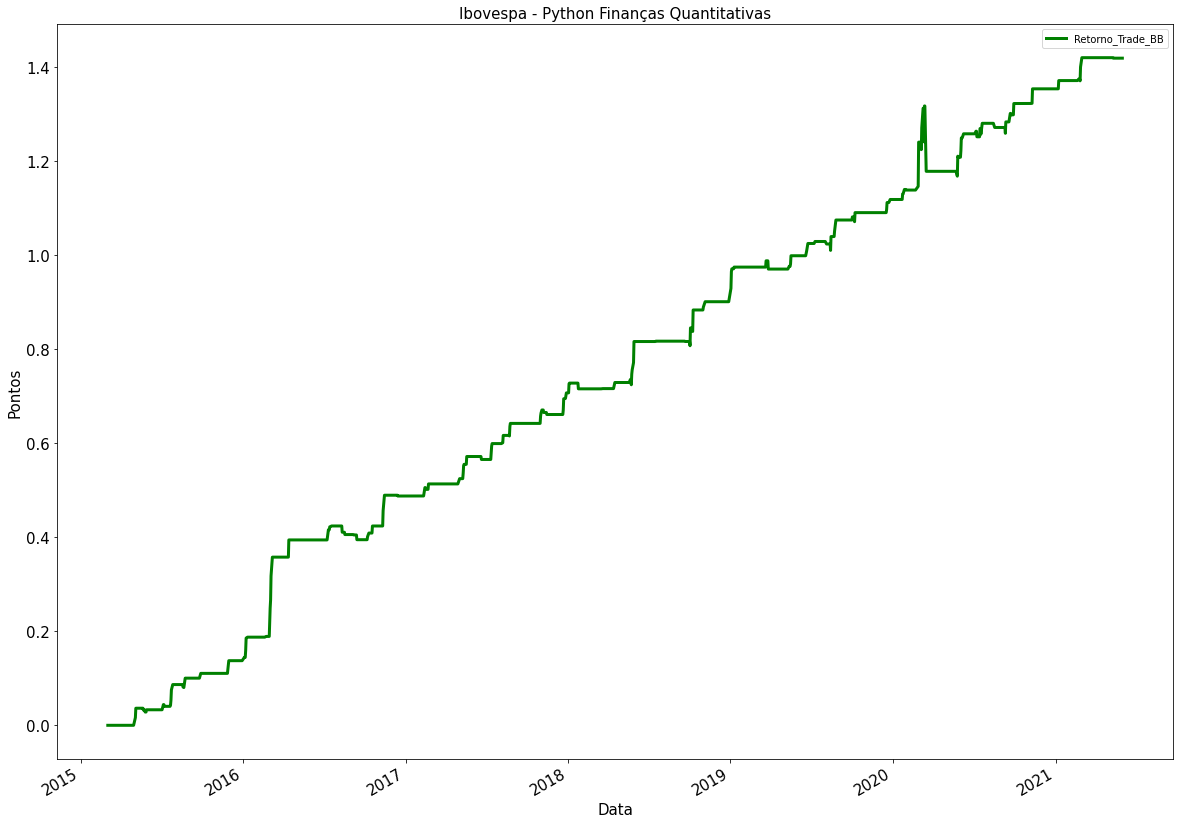

In [55]:
df['Retorno_Trade_BB'].plot(figsize=(20,15), linewidth=3,fontsize=15, color='green')

plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();